# Kortdage 2025 - Introdoktion til Python - Raster 
## Hvorfor arbejde med raster? 
Raster giver nogle andre muligheder end vektordata, da man typisk kan få dækket større arealer på én gang og danne grundlag for fx bydækkende eller landsdækkende datasæt. 
Man kan fx bruge den nationale højdemodel til at lave klimatilpasningsanalyser, finde højde på bygninger og andre ting.

I findes der en masse gratis og offentlig tilgængelige rasterdata, specielt i form af satellitbilleder. Både ESA og NASA udstiller mange af deres produkter gratis og de kan med relativt simple analyser bruges i den offentlige forvaltning. 

I disse øvelser bliver der anvendt billeder fra NASA's satellitter Landsat. Landsat-missionen har eksisteret siden 1970'erne og er bredt anvendt i forskning og offentlig forvaltning. Vi skal kun bruge data på overfladetemperaturer, for at vise et eksempel på, hvordan overfladetemperaturerne i en dansk by varierer bare på en enkelt dag. 



### Øvelse 1 - import af data 
Installation af libraries

In [4]:
!pip install geopandas
!pip install pandas
!pip install rasterio
!pip install rasterstats
!pip install owslib
!pip install matplotlib


'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


Indlæsning af libraries

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
from rasterstats import zonal_stats
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.colors import ListedColormap, Normalize
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable


Indlæsning af data

<Axes: >

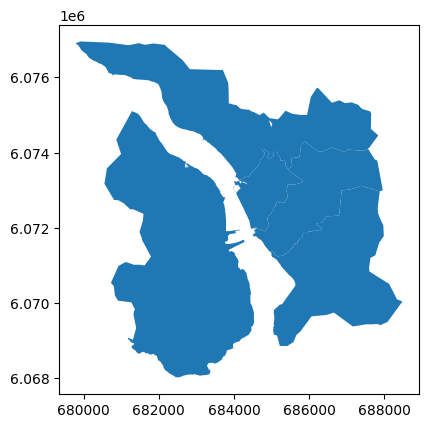

In [6]:
# inputuhi = r"/content/sample_data/lst_nykoebing_f_2025_celcius.tif"
inputuhi = r'D:\Projekter\Kortdage\python_kortdage\lst_nykoebing_f_2025_celcius.tif'
uhiraster = rasterio.open(inputuhi).read(1).astype(float)

uhiraster[uhiraster < 0] = np.nan 

# url = "/content/sample_data/nykoebing_afstemningsomraader.gpkg"
url =r"D:\Projekter\Kortdage\python_kortdage\nykoebing_afstemningsomraader.gpkg"
admin_gr_gdf = gpd.read_file(url)
admin_gr_gdf.set_crs(epsg=2582, inplace=True,allow_override=True)
admin_gr_gdf.plot()

Simpelt plot

Text(0.5, 1.0, 'Raw uhi')

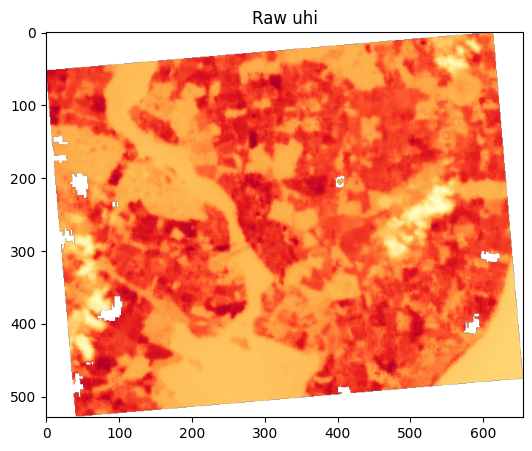

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

chm_plot = ax.imshow(uhiraster, cmap='YlOrRd' )

ax.set_title("Raw uhi")

### Øvelse 2 - zonal statistics.
Hvordan er overfladetemperaturen forskellig i byen 
Halla halla 

Zonal statistics

In [8]:
zs_uhi_adminomraader = zonal_stats(admin_gr_gdf, inputuhi, stats='mean',geojson_out=True)
gdf_uhi_adminomraader =  gpd.GeoDataFrame.from_features(zs_uhi_adminomraader)

Plot gennemsnitsværdier inden for grænser

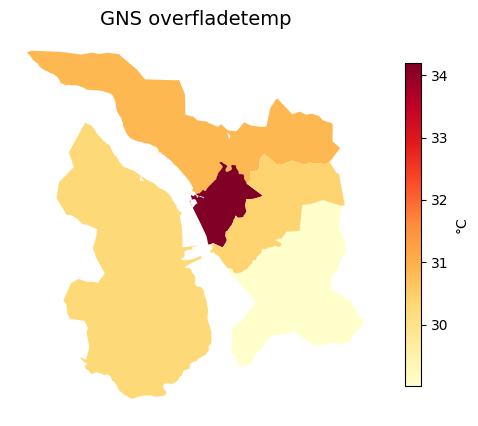

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# cmap = 'YlOrRd'
fig = gdf_uhi_adminomraader.plot(
    column='mean',
    cmap='YlOrRd',
    linewidth=0.5,
    legend= True,
    ax=ax,
    legend_kwds={'label': "°C", 'shrink': 0.7}
    )
ax.set_title("GNS overfladetemp", fontsize=14)
ax.axis('off')
plt.show()


### Øvelse 3 - Indeksering af raster 
Nemmere visulaisering
sammenligning med andre data 
halla halla 

Indeksering

Text(0.5, 1.0, 'Reclassed uhi')

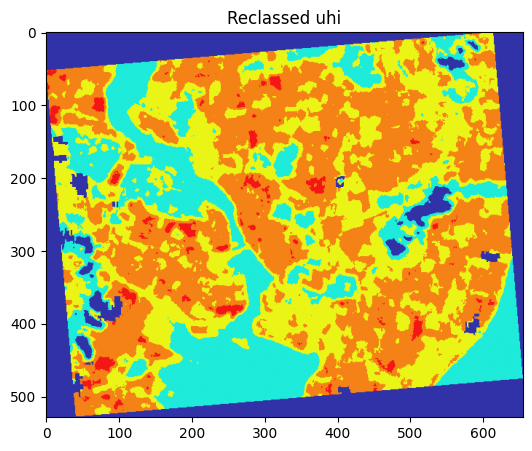

In [10]:
# reclassifier UHI
valid_mask = ~np.isnan(uhiraster)
valid_values = uhiraster[valid_mask]

# Define class bins
n_classes = 5
bins = np.linspace(np.nanmin(uhiraster), np.nanmax(uhiraster), n_classes + 1)

# Digitize only the valid values
reclassified_uhi = np.zeros_like(uhiraster, dtype=int)  # initialize output
reclassified_uhi[valid_mask] = np.digitize(valid_values, bins, right=False)

# Define the colors you want
cmap = ListedColormap(["#3232a8", "#1eebda", "#eaf516", "#f58216","#f51616"])

# Define a normalization from values -> colors
norm = colors.BoundaryNorm([1, 2, 3, 4,5], 5)

fig, ax = plt.subplots(figsize=(10, 5))

chm_plot = ax.imshow(reclassified_uhi,
                     cmap=cmap )

ax.set_title("Reclassed uhi")


### Øvelse 4 - udpegning af de varmeste områder 
Standardafvgielse halla halla 

In [46]:
merged_omr = admin_gr_gdf[['id','geometry']].dissolve()

uhi_std = zonal_stats(merged_omr, inputuhi, stats='mean std',geojson_out=True)
gdf_uhi_std =  gpd.GeoDataFrame.from_features(uhi_std)

mean_value = uhi_std[0]["properties"]["mean"]

std_value = uhi_std[0]["properties"]["std"]

uhi_graense = mean_value+(std_value*2)

print(round(uhi_graense,1))


38.6


30.376769824223032